# Time Series Components

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 333px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Accumulated Generation</th>
            <th>Output: Technology Relationship</th>
            <th>Input: Hourly Energy Generation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/01_output_2.png" alt="Solar Image 1">
            </td>
            <td>
                <img src="src/01_output_1.png" alt="Solar Image 2">
            </td>
            <td>
                <img src="src/01_input.png" alt="Solar Image 3">
            </td>
        </tr>
    </tbody>
</table>

## Data

In [1]:
import pandas as pd

df_passenger = pd.read_csv('../data/airline-passengers.csv', parse_dates=['Month'], index_col='Month')
df_passenger = df_passenger.asfreq('MS')
df_passenger

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Individual Components

- Trend (T)
- Seasonality (S)
- Residual or Irregular Component (I)

In [2]:
import statsmodels.api as sm

<Axes: xlabel='Month'>

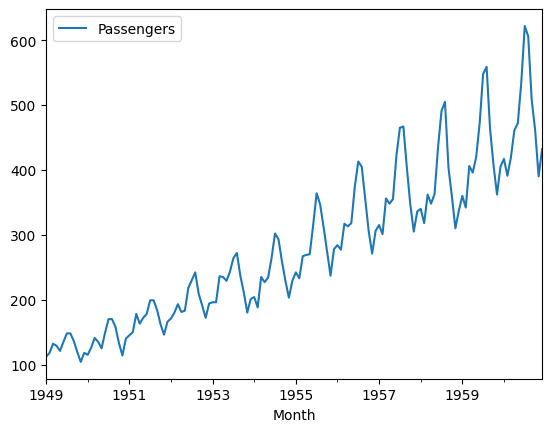

In [3]:
df_passenger.plot()

In [6]:
data = df_passenger['Passengers'].values

In [8]:
result = sm.tsa.seasonal_decompose(x=data, model='additive', period=12)

In [19]:
df_component = df_passenger.assign(trend=result.trend, seasonal=result.seasonal, residual=result.resid).dropna()

In [21]:
df_component['component_sum'] = df_component['trend'] + df_component['seasonal'] + df_component['residual']

In [22]:
df_component

,Passengers,trend,seasonal,residual,component_sum
Month,,,,,
1949-07-01,148,126.791667,63.830808,-42.622475,148.0
1949-08-01,148,127.250000,62.823232,-42.073232,148.0
1949-09-01,136,127.958333,16.520202,-8.478535,136.0
1949-10-01,119,128.583333,-20.642677,11.059343,119.0
1949-11-01,104,129.000000,-53.593434,28.593434,104.0
...,...,...,...,...,...
1960-02-01,391,461.375000,-36.188131,-34.186869,391.0
1960-03-01,419,465.208333,-2.241162,-43.967172,419.0
1960-04-01,461,469.333333,-8.036616,-0.296717,461.0


## Decomposition by Model

- Additive Model $y_t = T_t + S_t + e_t$
- Multiplicative Model $y_t = T_t \times S_t \times e_t$

In [23]:
import statsmodels.api as sm 

data = df_passenger['Passengers'].values
result = sm.tsa.seasonal_decompose(data, model='multiplicative', period=12)

df_component = (df_passenger
 .assign(
    trend = result.trend,
    seasonal = result.seasonal,
    residual = result.resid)
 .dropna())

df_component

,Passengers,trend,seasonal,residual
Month,,,,
1949-07-01,148,126.791667,1.226556,0.951664
1949-08-01,148,127.250000,1.219911,0.953401
1949-09-01,136,127.958333,1.060492,1.002220
1949-10-01,119,128.583333,0.921757,1.004028
1949-11-01,104,129.000000,0.801178,1.006270
...,...,...,...,...
1960-02-01,391,461.375000,0.883625,0.959079
1960-03-01,419,465.208333,1.007366,0.894086
1960-04-01,461,469.333333,0.975906,1.006495


In [24]:
df_component_mul = df_component.copy()
df_component_mul['component_mul'] = df_component.trend * df_component.seasonal * df_component.residual
df_component_mul

,Passengers,trend,seasonal,residual,component_mul
Month,,,,,
1949-07-01,148,126.791667,1.226556,0.951664,148.0
1949-08-01,148,127.250000,1.219911,0.953401,148.0
1949-09-01,136,127.958333,1.060492,1.002220,136.0
1949-10-01,119,128.583333,0.921757,1.004028,119.0
1949-11-01,104,129.000000,0.801178,1.006270,104.0
...,...,...,...,...,...
1960-02-01,391,461.375000,0.883625,0.959079,391.0
1960-03-01,419,465.208333,1.007366,0.894086,419.0
1960-04-01,461,469.333333,0.975906,1.006495,461.0


,Passengers,trend,seasonal,residual,component_sum
Month,,,,,
1949-07-01,148,126.791667,63.830808,-42.622475,148.0
1949-08-01,148,127.250000,62.823232,-42.073232,148.0
...,...,...,...,...,...
1960-05-01,472,472.750000,-4.506313,3.756313,472.0
1960-06-01,535,475.041667,35.402778,24.555556,535.0
